# **AfDB’s Investment:** *A 50-Year Analysis of Development Projects*

**Author**: Akorede Ayodeji Abdulwarith  
**Project Type**: Exploratory Data Analysis (EDA)  
**Tools Used**: Python, Pandas, Matplotlib, Seaborn  

### - Introduction

The African Development Bank (AfDB) is Africa’s leading development finance institution, founded in 1964 to promote economic growth and reduce poverty. It supports both public and private sector projects across infrastructure, agriculture, education, and health. With 81 member countries, AfDB channels billions annually into transformative initiatives. Over the past 50 years, its investment strategy has evolved in response to shifting regional priorities.

This analysis explores over five decades of project-level data from the African Development Bank (AfDB), spanning 1967 to 2020. The goal is to uncover how development financing has been distributed across sectors, regions, and countries.



### Metadata:

| Column Name           | Description                                                                 |
|-----------------------|-----------------------------------------------------------------------------|
| Financing Instruments | Type of financial mechanism used                 |
| Country               | Country where the project is implemented                                    |
| Project Name          | Title or name of the development project                                    |
| Currency              | Currency in which the project amount is denominated (USD)                         |
| YearAPP               | Year the project was approved                                               |
| Amount in Millions    | Total project amount in millions (likely in USD or local currency)          |
| Lending Instruments   | Lending mechanism used by AfDB (e.g., sovereign loan, non-sovereign loan)   |
| Sectors               | Sector classification (e.g., Agriculture, Health, Infrastructure)           |


**Data Ingestion and Preprocessing**

In [1]:
# Import Important Libraries 
import numpy as np # linear algebra
import pandas as pd # data processing

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# Import important Llibraries for visualization.
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

/kaggle/input/african-development-bank-projects-1967-2018/Projects.csv


In [2]:
# Loading data
df = pd.read_csv('/kaggle/input/african-development-bank-projects-1967-2018/Projects.csv', delimiter = ";")

In [3]:
# data preview
df.head(5)

,Financing Instruments,Country,Project Name,Curency,YearAPP,Amount in Millions,Lending Instruments,Sectors
0,ADB Operations,Algeria,AGRICULTURAL EQUIPMENT MANUFACTURE,US$,1987.0,26.900,Project Loans (Public),"Industry, mining and quarrying"
1,ADB Operations,Algeria,AGRICULTURAL LINE OF CREDIT,US$,1986.0,60.000,Lines of Credit (Public),Finance
2,ADB Operations,Algeria,AIR ALGERIA BASE MAINTENANCE,US$,1989.0,40.170,Project Loans (Public),Transport
3,ADB Operations,Algeria,APPUI MODERNISATION DU SI DES BANQUES,US$,2012.0,0.750,Middle Income Countries Grant,Finance
4,ADB Operations,Algeria,APPUI ORGANISATION FORUM AFRICAIN (FAIA),US$,2016.0,0.398,Middle Income Countries Grant,Multisector


In [4]:
# checking for empty columns
df.isnull().sum()

Financing Instruments    67
Country                  67
Project Name             67
Curency                  67
YearAPP                  67
Amount in Millions       67
Lending Instruments      67
Sectors                  67
dtype: int64

In [5]:
# Dropping empty rows
df.dropna(inplace = True)

In [6]:
#Introducing a Region Column by mapping countries to their respective region
region_map = {
    # West Africa
    'Nigeria': 'West Africa',
    'Ghana': 'West Africa',
    'Senegal': 'West Africa',
    'Côte d’Ivoire': 'West Africa',
    'Niger': 'West Africa',
    'Benin': 'West Africa',
    'Mali': 'West Africa',
    'Togo': 'West Africa',
    'Burkina Faso': 'West Africa',
    'Sierra Leone': 'West Africa',
    'Liberia': 'West Africa',
    'Guinea': 'West Africa',
    'Guinea-Bissau': 'West Africa',
    'The Gambia': 'West Africa',
    'Cape Verde': 'West Africa',
    'Mauritania': 'West Africa',

    # East Africa
    'Kenya': 'East Africa',
    'Uganda': 'East Africa',
    'Tanzania': 'East Africa',
    'Rwanda': 'East Africa',
    'Burundi': 'East Africa',
    'South Sudan': 'East Africa',
    'Ethiopia': 'East Africa',
    'Somalia': 'East Africa',
    'Eritrea': 'East Africa',
    'Djibouti': 'East Africa',

    # Southern Africa
    'South Africa': 'Southern Africa',
    'Botswana': 'Southern Africa',
    'Namibia': 'Southern Africa',
    'Zimbabwe': 'Southern Africa',
    'Zambia': 'Southern Africa',
    'Mozambique': 'Southern Africa',
    'Malawi': 'Southern Africa',
    'Lesotho': 'Southern Africa',
    'Eswatini': 'Southern Africa',
    'Angola': 'Southern Africa',
    'Madagascar': 'Southern Africa',
    'Mauritius': 'Southern Africa',
    'Seychelles': 'Southern Africa',
    'Comoros': 'Southern Africa',

    # North Africa
    'Egypt': 'North Africa',
    'Algeria': 'North Africa',
    'Morocco': 'North Africa',
    'Tunisia': 'North Africa',
    'Libya': 'North Africa',
    'Sudan': 'North Africa',
    'Western Sahara': 'North Africa',

    # Central Africa
    'Cameroon': 'Central Africa',
    'Chad': 'Central Africa',
    'Congo': 'Central Africa',
    'DR Congo': 'Central Africa',
    'Gabon': 'Central Africa',
    'Equatorial Guinea': 'Central Africa',
    'Central African Republic': 'Central Africa',
    'São Tomé and Príncipe': 'Central Africa'
}

df['Region'] = df['Country'].map(region_map)


In [7]:
# Creating a Clean 'Year' Column
df['Year'] = df['YearAPP'].astype(int)

1. **Annual Analysis:** Aggregating AfDB’s development spending and project count by year


In [8]:
#Grouping number of projects and funding by Year.
df_annual = df.groupby('Year').agg(
    no_of_projects=('Project Name', 'count'),
    Annual_Spending = ('Amount in Millions', 'sum')
)
df_annual.reset_index(inplace=True)
df_annual.rename(columns={'Annual_Spending':'Annual Spending (Millions USD)'}, inplace=True)
df_annual.rename(columns={'no_of_projects':'Number of Projects'}, inplace=True)
df_annual

,Year,Number of Projects,Annual Spending (Millions USD)
0,1967,1,2.300000
1,1968,4,3.626095
2,1969,5,7.920000
3,1970,7,15.790000
4,1971,13,25.141000
5,1972,18,25.266053
6,1973,17,35.742308
7,1974,42,112.334183
8,1975,53,167.738399
9,1976,45,149.548639


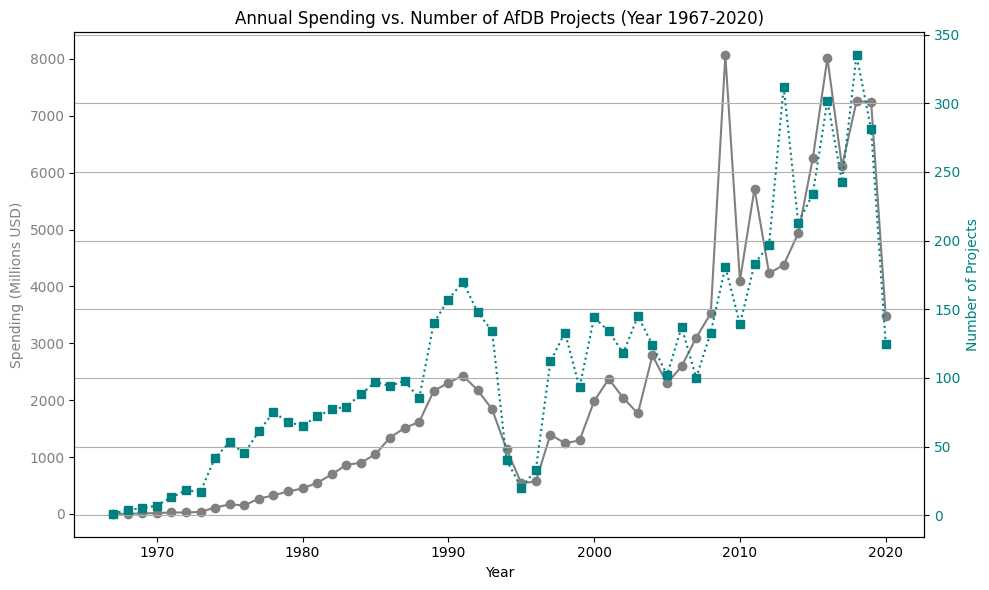

In [9]:
# Visualizing Annual Spending and Project Volume (AfDB). 
fig, ax1 = plt.subplots(figsize=(10,6))

# Primary Y-axis: Annual Spending
ax1.plot(df_annual['Year'], df_annual['Annual Spending (Millions USD)'],
         marker='o', linestyle='-', color='grey', label='Spending (Millions USD)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Spending (Millions USD)', color='grey')
ax1.tick_params(axis='y', labelcolor='grey')

# Secondary Y-axis: Number of Projects
ax2 = ax1.twinx()
ax2.plot(df_annual['Year'], df_annual['Number of Projects'],
         marker='s', linestyle='dotted', color='teal', label='Number of Projects')
ax2.set_ylabel('Number of Projects', color='teal')
ax2.tick_params(axis='y', labelcolor='teal')

# Title and Grid
plt.title('Annual Spending vs. Number of AfDB Projects (Year 1967-2020)')
fig.tight_layout()
plt.grid(True)
plt.show()


**2. Country/Regional Analysis**

Which countries received AfDB funding, and through which financing instruments?

In [10]:
#Creating a new data frame for Countries, grouped by 'country' and 'Financing Instruments' columns with number of projects and project funding amount as aggregates.

df_country = df.groupby(['Country','Financing Instruments']).agg(
    no_of_projects=('Project Name', 'count'),
    Amount_millions_USD =('Amount in Millions', 'sum')
).reset_index()
df_country.rename(columns={
    'Amount_millions_USD':'Amount in Millions (USD)',
    'no_of_projects':'Number of Projects'
}, inplace=True)
df_country

,Country,Financing Instruments,Number of Projects,Amount in Millions (USD)
0,Algeria,ADB Operations,48,2616.027656
1,Algeria,ADF Operations,3,2.744735
2,Algeria,Special Fund,2,0.580000
3,Angola,ADB Operations,23,1887.552601
4,Angola,ADF Operations,27,192.226724
...,...,...,...,...
224,Zmultinational,ADB Operations,263,8141.656597
225,Zmultinational,ADF Operations,454,6789.094851
226,Zmultinational,NTF Operations,5,27.224645
227,Zmultinational,Private Sector Facility,18,236.729830


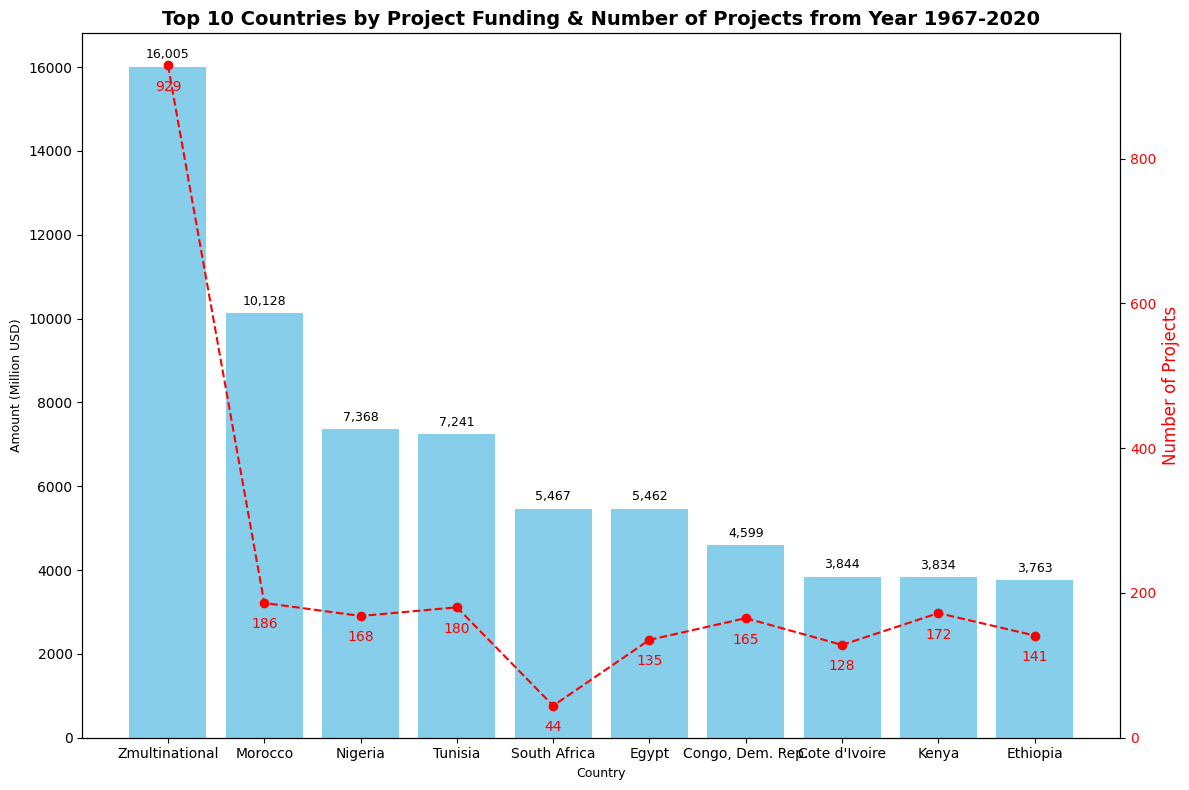

In [11]:
#Visualizing Project Funding and Project Volume (AfDB) for Top 10 country.
# First we have to create a table grouped by 'Country' with number of projects and funding as aggregates.
top_country = df_country.groupby('Country').sum().reset_index()

# Next, we have to select top 10 countries by project funding
top10 = top_country.sort_values('Amount in Millions (USD)', ascending=False).head(10)

#  Then, we plot a Bar chart of project funding with a Secondary Line chart displaying the number of projects.
fig, ax1 = plt.subplots(figsize=(12,8))

# Bar chart for Amount
bars = ax1.bar(top10["Country"], top10['Amount in Millions (USD)'], 
               color="skyblue", label="Amount (Million USD)")

ax1.set_ylabel("Amount (Million USD)", fontsize=9)
ax1.set_xlabel("Country", fontsize=9)
ax1.tick_params(axis="y")

# Data label
for bar in bars:
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height()+200,
             f"{bar.get_height():,.0f}", ha="center", fontsize=9)

# Second axis for number of projects
ax2 = ax1.twinx()
ax2.plot(top10["Country"], top10['Number of Projects'], "o--r", label="No. of Projects")
ax2.set_ylabel("Number of Projects", fontsize=12, color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Data label
for x, y in zip(top10["Country"], top10['Number of Projects']):
    ax2.text(x, y-20, str(y), ha="center", va="top", fontsize=10, color="red")


# Title
plt.title("Top 10 Countries by Project Funding & Number of Projects from Year 1967-2020", 
          fontsize=14, fontweight="bold")

# Adjust layout
fig.tight_layout()
plt.show()


How did AfDB allocate funding across regions and financing instruments?

In [12]:
df_region = df.groupby(['Region', 'Financing Instruments']).agg(
    no_of_projects = ('Region', 'count'),
    Amount_millions_USD = ('Amount in Millions', 'sum')
)
df_region.reset_index(inplace = True)
df_region.rename(columns={
    'Amount_millions_USD':'Amount (Millions USD)',
    'no_of_projects':'Number of Projects'
}, inplace=True)

df_region

,Region,Financing Instruments,Number of Projects,Amount (Millions USD)
0,Central Africa,ADB Operations,162,5583.599285
1,Central Africa,ADF Operations,185,1492.826078
2,Central Africa,NTF Operations,1,5.000000
3,Central Africa,Private Sector Facility,2,39.528063
4,Central Africa,Special Fund,22,137.349103
5,Central Africa,Transition Support Facility,16,108.661482
6,East Africa,ADB Operations,224,5330.499405
7,East Africa,ADF Operations,648,11195.169659
8,East Africa,NTF Operations,19,80.758465
9,East Africa,Private Sector Facility,3,16.186817


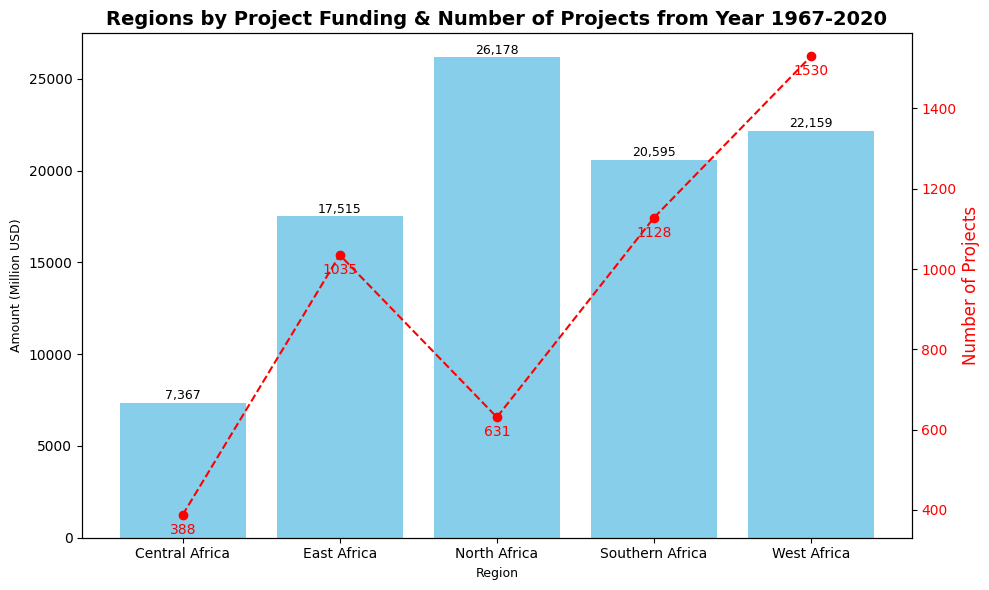

In [13]:
#Visualizing Project Funding and Project Volume (AfDB) for each Region.
# First we have to create a table grouped by 'Region' with number of projects and funding as aggregates.
region = df_region.groupby('Region').sum().reset_index()


fig, ax1 = plt.subplots(figsize=(10,6))

# Bar chart for Amount
bars = ax1.bar(region["Region"], region['Amount (Millions USD)'], 
               color="skyblue", label="Amount (Million USD)")

ax1.set_ylabel("Amount (Million USD)", fontsize=9)
ax1.set_xlabel("Region", fontsize=9)
ax1.tick_params(axis="y")

# Data label
for bar in bars:
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height()+200,
             f"{bar.get_height():,.0f}", ha="center", fontsize=9)

# Second axis for number of projects
ax2 = ax1.twinx()
ax2.plot(region["Region"], region["Number of Projects"], "o--r", label="No. of Projects")
ax2.set_ylabel("Number of Projects", fontsize=12, color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Data label
for x, y in zip(region["Region"], region["Number of Projects"]):
    ax2.text(x, y-20, str(y), ha="center", va="top", fontsize=10, color="red")


# Title
plt.title("Regions by Project Funding & Number of Projects from Year 1967-2020", 
          fontsize=14, fontweight="bold")

# Adjust layout
fig.tight_layout()
plt.show()

In [14]:
# plotting an interactive map chart to highlight project count and average countries accross regions.

import plotly.graph_objects as go

country_summary = df.groupby('Country').agg({
    'Project Name': 'count',
    'Amount in Millions': 'mean'
}).reset_index().rename(columns={
    'Project Name': 'Project Count',
    'Amount in Millions': 'Avg Funding (M USD)'
})
country_summary['Avg Funding (M USD)'] = country_summary['Avg Funding (M USD)'].round(2)


fig = go.Figure(data=go.Choropleth(
    locations=country_summary['Country'],
    locationmode='country names',
    z=country_summary['Project Count'],
    colorscale='sunsetdark',
    colorbar_title='Project Count',
    hovertext=country_summary['Avg Funding (M USD)'],  
    hovertemplate='Country: %{location}<br>Projects: %{z}<br>Avg Funding: %{hovertext}M USD<extra></extra>'))

fig.update_layout(
    title='AfDB Project Count by Country (1967–2020)',
    geo=dict(
        scope='africa',
        showcountries=True,
        countrycolor='black',
        projection_type='natural earth'
    )
)

fig.show()


How are AfDB’s financing instruments distributed across countries?

In [15]:
pivot_amount = df_country.pivot(
    index="Country", 
    columns="Financing Instruments", 
    values='Amount in Millions (USD)'
).fillna(0)
pivot_amount


Financing Instruments,ADB Operations,ADF Operations,NTF Operations,Private Sector Facility,Special Fund,Transition Support Facility
Country,,,,,,
Algeria,2616.027656,2.744735,0.000000,0.000000,0.580000,0.000000
Angola,1887.552601,192.226724,0.000000,0.000000,46.219294,0.000000
Benin,223.292926,764.431126,25.420000,0.000000,72.106285,0.000000
Botswana,1530.194332,84.819679,12.986000,0.000000,1.745418,0.000000
Burkina Faso,133.761552,1156.566820,0.000000,0.000000,48.586743,0.000000
Burundi,52.941194,653.257479,13.941247,0.000000,3.646291,155.923127
Cabo Verde,268.118088,170.166005,13.600000,0.000000,1.873375,0.000000
Cameroon,2386.387139,672.320295,5.000000,30.795004,44.624198,0.000000
Central African Rep.,20.765399,318.904405,0.000000,0.000000,36.477311,99.878000


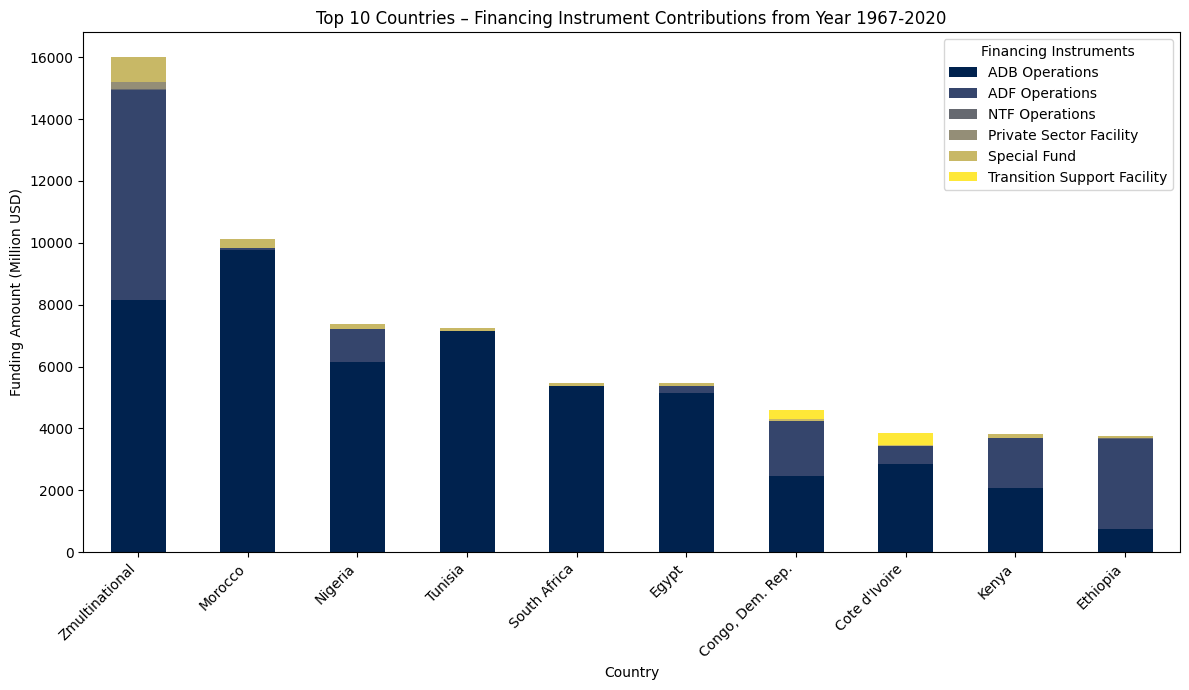

In [16]:
# Visualizing Financial Instrument Distribution among Top 10 Countries by Funding

# Sort by total funding
pivot_amount = pivot_amount.loc[pivot_amount.sum(axis=1).sort_values(ascending=False).head(10).index]

ax = pivot_amount.plot(
    kind="bar",
    stacked=True,
    figsize=(12,7),
    colormap="cividis"
)

ax.set_ylabel("Funding Amount (Million USD)")
ax.set_title("Top 10 Countries – Financing Instrument Contributions from Year 1967-2020")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


How are AfDB’s financing instruments distributed across Regions?

In [17]:
df_pivot_region = df_region.pivot(
    index = 'Region',
    columns = "Financing Instruments",
    values = 'Amount (Millions USD)'
).fillna(0)
df_pivot_region

Financing Instruments,ADB Operations,ADF Operations,NTF Operations,Private Sector Facility,Special Fund,Transition Support Facility
Region,,,,,,
Central Africa,5583.599285,1492.826078,5.000000,39.528063,137.349103,108.661482
East Africa,5330.499405,11195.169659,80.758465,16.186817,518.547194,373.746921
North Africa,24885.151971,594.676394,0.000000,48.805100,494.787873,154.337386
Southern Africa,14389.122925,5243.947296,117.565219,10.874372,514.055167,319.268813
West Africa,10636.298389,9957.994892,211.254468,55.655350,684.245232,613.768263


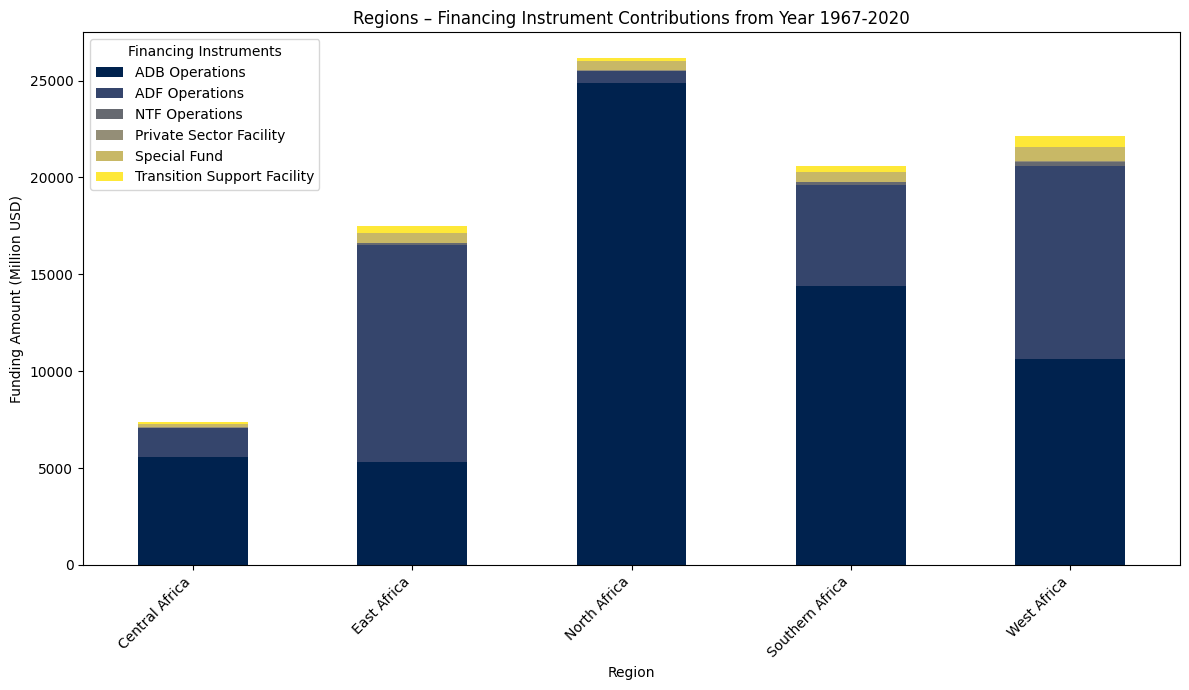

In [18]:
ax = df_pivot_region.plot(
    kind="bar",
    stacked=True,
    figsize=(12,7),
    colormap="cividis"
)

ax.set_ylabel("Funding Amount (Million USD)")
ax.set_title("Regions – Financing Instrument Contributions from Year 1967-2020")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


**3. Project Analysis**

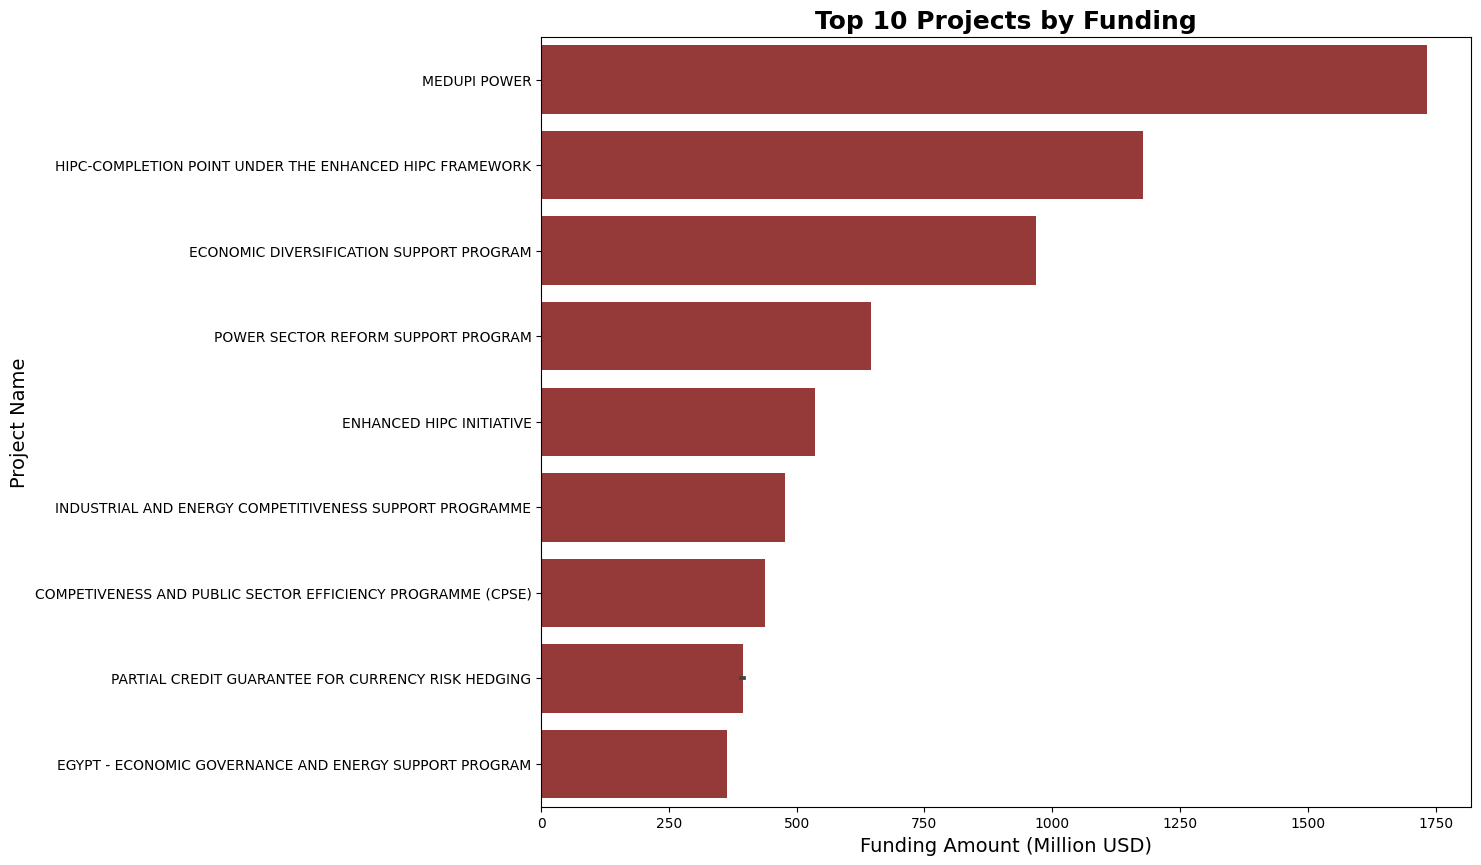

In [19]:
top10_projects = df.sort_values(by="Amount in Millions", ascending=False).head(10)

plt.figure(figsize=(12,10))
sns.barplot(
    data=top10_projects, 
    x="Amount in Millions", 
    y="Project Name", 
    color="brown"
)
plt.title("Top 10 Projects by Funding", fontsize = 18, fontweight='bold')
plt.xlabel("Funding Amount (Million USD)", fontsize=14)
plt.ylabel("Project Name", fontsize=14)
plt.show()

**4. Financing Instruments Analysis**

How do different financing instruments shape AfDB’s investment strategy?

In [20]:
df_fin_instruments = df.groupby("Financing Instruments").agg(
     no_of_projects = ('Region', 'count'),
    Amount_millions_USD = ('Amount in Millions', 'sum')
).reset_index().sort_values('Amount_millions_USD', ascending=False)
df_fin_instruments.rename(columns={
    'Amount_millions_USD':'Amount (Millions USD)',
    'no_of_projects':'Number of Projects'
}, inplace=True)
# Calculate average funding per project
df_fin_instruments['Avg Funding per Project'] = (
    df_fin_instruments['Amount (Millions USD)'] * 1_000_000 / df_fin_instruments['Number of Projects']
).round(2)
df_fin_instruments

,Financing Instruments,Number of Projects,Amount (Millions USD),Avg Funding per Project
0,ADB Operations,1614,74588.106280,46213200.92
1,ADF Operations,2382,38683.224096,16239808.60
4,Special Fund,371,3294.734954,8880687.21
5,Transition Support Facility,245,2389.347160,9752437.39
2,NTF Operations,86,487.231476,5665482.28
3,Private Sector Facility,14,407.779532,29127109.44


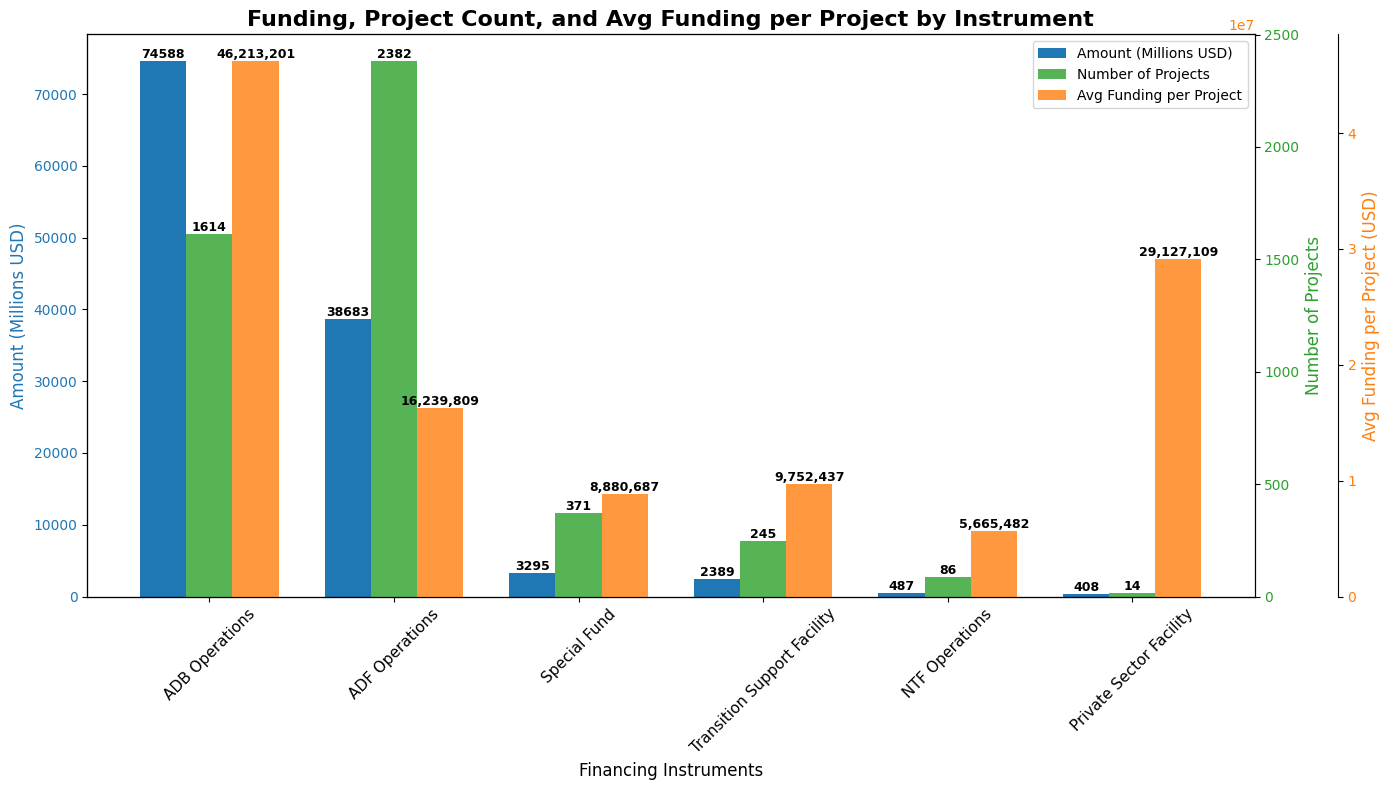

In [21]:

# Data
instruments = df_fin_instruments['Financing Instruments']
amounts = df_fin_instruments['Amount (Millions USD)']
projects = df_fin_instruments['Number of Projects']
avg_funding = df_fin_instruments['Avg Funding per Project']

#choosing colors for each bar
colors = {
    'amount': '#1f77b4',      
    'projects': '#2ca02c',   
    'avg_funding': '#ff7f0e'  
}

# formating data labels
def add_labels(ax, bars, fmt="{:.0f}"):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height,
            fmt.format(height),
            ha='center', va='bottom',
            fontsize=9, fontweight='bold', color='black'
        )

x = np.arange(len(instruments))
width = 0.25

fig, ax1 = plt.subplots(figsize=(14,8))

bars1 = ax1.bar(x - width, amounts, width, label='Amount (Millions USD)', color=colors['amount'])
ax1.set_ylabel('Amount (Millions USD)', color=colors['amount'], fontsize=12)
ax1.tick_params(axis='y', labelcolor=colors['amount'])

ax2 = ax1.twinx()
bars2 = ax2.bar(x, projects, width, label='Number of Projects', color=colors['projects'], alpha=0.8)
ax2.set_ylabel('Number of Projects', color=colors['projects'], fontsize=12)
ax2.tick_params(axis='y', labelcolor=colors['projects'])

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
bars3 = ax3.bar(x + width, avg_funding, width, label='Avg Funding per Project', color=colors['avg_funding'], alpha=0.8)
ax3.set_ylabel('Avg Funding per Project (USD)', color=colors['avg_funding'], fontsize=12)
ax3.tick_params(axis='y', labelcolor=colors['avg_funding'])

# Add value labels
add_labels(ax1, bars1)
add_labels(ax2, bars2)
add_labels(ax3, bars3, fmt="{:,.0f}")

# X-axis
ax1.set_xticks(x)
ax1.set_xticklabels(instruments, fontsize=11, rotation=45)
ax1.set_xlabel('Financing Instruments', fontsize=12)

# Title and legend
plt.title('Funding, Project Count, and Avg Funding per Project by Instrument', fontsize=16, fontweight='bold')
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.tight_layout()
plt.show()


**5. Sector Analysis**

Which sectors received the most investment and attention from AfDB?

In [22]:
df_sector = df.groupby('Sectors').agg(
    no_of_projects=('Project Name', 'count'),
    Amount_millions_USD =('Amount in Millions', 'sum')
).reset_index()
df_sector.rename(columns={
    'Amount_millions_USD':'Amount (Millions USD)',
    'no_of_projects':'Number of Projects'
}, inplace=True)
# Calculate average funding per project
df_sector['Avg Funding per Project'] = (
    df_sector['Amount (Millions USD)'] * 1_000_000 / df_sector['Number of Projects']
).round(2)
df_sector

,Sectors,Number of Projects,Amount (Millions USD),Avg Funding per Project
0,Agriculture and Rural Development,1213,13236.666368,10912338.31
1,Communications,109,1454.186732,13341162.68
2,Education,319,3741.400019,11728526.70
3,Energy Supply,578,18346.358468,31741104.62
4,Environment,92,489.362129,5319153.57
5,Finance,618,19573.857392,31672908.40
6,"Gender, Population and Nutrition",61,188.931306,3097234.52
7,Health,295,2338.606509,7927479.69
8,"Industry, mining and quarrying",180,3868.222052,21490122.51
9,Multisector,1022,23981.533619,23465297.08


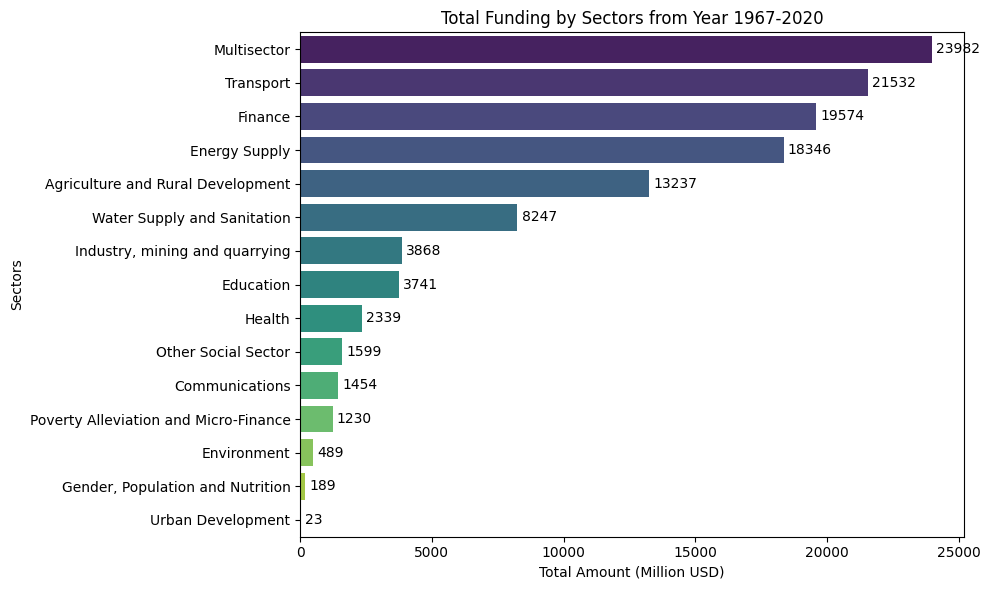

In [23]:
# Visualizing Total Funding by Sectors
total_sector = df_sector.sort_values('Amount (Millions USD)', ascending=False)

plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=total_sector,
    x="Amount (Millions USD)",
    y="Sectors",
    palette="viridis"
)

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", padding=3)  # no decimals

plt.title("Total Funding by Sectors from Year 1967-2020")
plt.xlabel("Total Amount (Million USD)")
plt.ylabel("Sectors")
plt.tight_layout()
plt.show()


Which sectors receive the highest average funding per AfDB project?

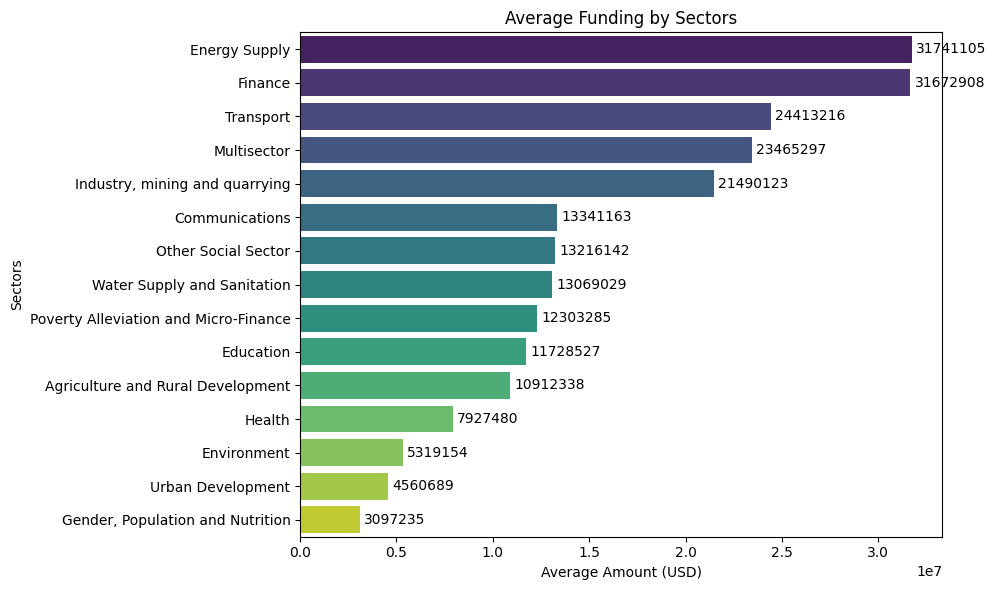

In [24]:
# Visualizing Average Funding by Sectors
avg_sector = df_sector.sort_values('Avg Funding per Project', ascending=False)

plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=avg_sector,
    x='Avg Funding per Project',
    y="Sectors",
    palette="viridis"
)

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", padding=3)  # no decimals

plt.title("Average Funding by Sectors")
plt.xlabel("Average Amount (USD)")
plt.ylabel("Sectors")
plt.tight_layout()
plt.show()


How has AfDB’s sectoral investment evolved over time since 2010?

In [25]:
df_sectors = df[df['Year'] > 2009].groupby(['Year','Sectors']).agg(
     no_of_projects=('Project Name', 'count'),
    Amount_millions_USD =('Amount in Millions', 'sum')
).reset_index()
df_sectors.rename(columns={
    'Amount_millions_USD':'Amount (Millions USD)',
    'no_of_projects':'Number of Projects'
}, inplace=True)
df_sectors

,Year,Sectors,Number of Projects,Amount (Millions USD)
0,2010,Agriculture and Rural Development,10,71.143201
1,2010,Communications,2,32.426853
2,2010,Education,6,48.278274
3,2010,Energy Supply,14,887.646325
4,2010,Finance,23,689.871179
...,...,...,...,...
133,2020,Finance,13,400.432485
134,2020,Health,20,224.418490
135,2020,Multisector,61,2305.580672
136,2020,Transport,10,111.203116


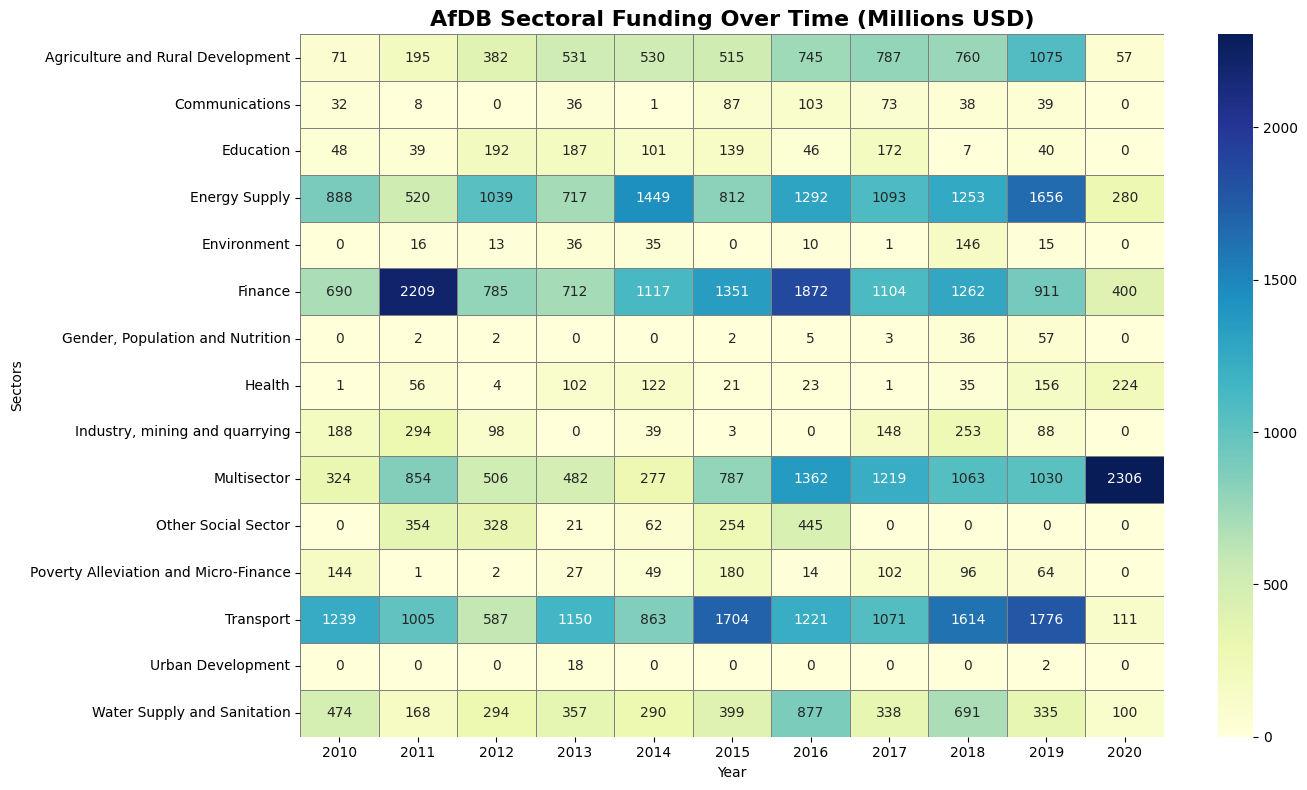

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Sectors,,,,,,,,,,,
Agriculture and Rural Development,71.143201,195.497331,381.656450,530.544526,530.357356,514.618167,745.430376,786.666066,760.280191,1075.184580,56.719526
Communications,32.426853,7.568590,0.000000,35.964076,0.798652,86.952367,103.257278,72.504472,38.068016,38.830173,0.000000
Education,48.278274,38.984200,191.602772,186.742108,101.340158,139.204437,45.580300,172.163571,7.463521,39.750000,0.000000
Energy Supply,887.646325,519.807755,1038.899113,717.248739,1448.601128,811.578640,1291.812785,1093.120184,1252.784321,1656.475798,279.909703
Environment,0.000000,15.511126,13.438922,36.054976,35.300384,0.000000,9.581609,0.967361,146.376063,15.227422,0.000000
Finance,689.871179,2209.165923,784.667829,711.909281,1117.287548,1351.431664,1871.658460,1104.314803,1262.326623,910.664343,400.432485
"Gender, Population and Nutrition",0.000000,1.674965,2.007223,0.473907,0.000000,1.709320,5.161906,2.903797,36.271808,56.549046,0.000000
Health,1.150494,56.000000,3.658916,102.479458,121.708156,21.160627,22.797850,1.428880,35.239918,155.684249,224.418490
"Industry, mining and quarrying",187.960571,293.688592,98.394952,0.000000,39.108330,3.055062,0.000000,148.102216,253.074091,88.230602,0.000000


In [26]:
# Pivot the data for heatmap
heatmap_data = df_sectors.pivot(index="Sectors", columns="Year", values="Amount (Millions USD)").fillna(0)

plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_data, 
    cmap="YlGnBu", 
    linewidths=0.5, 
    linecolor='gray',
    annot=True, 
    fmt=".0f"
)
plt.title("AfDB Sectoral Funding Over Time (Millions USD)", fontsize=16, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Sectors")
plt.tight_layout()
plt.show()
heatmap_data

# Conclusion

1. AfDB's annual spending and project count have steaadily increased from the year it was found till date, with notable peaks around 2019.
2. Multinational projects received the highest number of projects and project funding.
3. Morocco as a country received both the highest project funding and project count, while Nigeria recieved the second largest project funding, but Tunisia had the second highest project count.
4. North Africa as a region received the highest project funding despite having the second lowest project count.
5. West African region received the highest number of AfDB projects and second highest project funding.
6. Central Africa received both the lowest number of AfDB projects and project funding in the continent.
7. ADB operations contributed the bulk of investments, with ADB operations being the major contributor to 9 out of top ten recipient countries. Followed distantly by ADF operations.
8. ADB and ADF operations contributed the bulk of investments across all regions, with ADB operation being the highest contributor.
9. “MEDUPI POWER” project received the highest AfDB funding, followed by "HIPC-COMPLETION POINT" project.
10. ADB Operations contributed the highest total amount of project funding and the highest average funding per project, followed by ADF operations funding the most projects. Private Sector Facility had both the lowest project fundng and the fewest projects overall.
11. Multisector, transport, and finance received the highest AfDB funding from 1967 to 2020. Sectors like environment and urban development received comparatively minimal investment.
12. Energy supply and finance sectors received the highest average funding per project.
13. From 2010 to 2020, AfDB funding showed strong and consistent support for transport, multisector, and energy supply projects, with notable peaks in multisector funding in 2020.